<a href="https://colab.research.google.com/github/ShivM99/Python/blob/main/Taxi_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
import pandas as pd 
import numpy as np
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing the dataset**

In [2]:
data=pd.read_csv ('nyc_taxi_trip_duration.csv')
data.shape

(729322, 11)

**Handling the date-time data**

In [3]:
data['pickup_datetime'] = pd.to_datetime (data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime (data['dropoff_datetime'])

data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map (lambda x: x.total_seconds())

duration_difference = data[np.abs (data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape

(693207, 12)

**Extracting important features from the 'pickup_datetime'**

In [4]:
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_day']

0         29
1          3
2         21
3          1
4         17
          ..
729317    21
729318    22
729319    15
729320    19
729321     1
Name: pickup_day, Length: 729322, dtype: int64

In [5]:
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_month']

0          2
1         11
2          2
3          5
4          2
          ..
729317     5
729318     2
729319     4
729320     6
729321     1
Name: pickup_month, Length: 729322, dtype: int64

In [6]:
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
data['pickup_dayofweek']

0         0
1         3
2         6
3         6
4         2
         ..
729317    5
729318    0
729319    4
729320    6
729321    4
Name: pickup_dayofweek, Length: 729322, dtype: int64

In [7]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_hour']

0         16
1         23
2         17
3          9
4          6
          ..
729317    13
729318     0
729319    18
729320     9
729321    17
Name: pickup_hour, Length: 729322, dtype: int64

In [8]:
data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['pickup_minute']

0         40
1         35
2         59
3         44
4         42
          ..
729317    29
729318    43
729319    56
729320    50
729321    24
Name: pickup_minute, Length: 729322, dtype: int64

In [9]:
data.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
trip_duration                   int64
check_trip_duration           float64
pickup_day                      int64
pickup_month                    int64
pickup_dayofweek                int64
pickup_hour                     int64
pickup_minute                   int64
dtype: object

In [10]:
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')

In [11]:
data.isna ().sum ()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
check_trip_duration    0
pickup_day             0
pickup_month           0
pickup_dayofweek       0
pickup_hour            0
pickup_minute          0
dtype: int64

In [12]:
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

**'trip_duration' is positively skewed**

<ipython-input-13-0f4ad24b6bb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data['trip_duration'], kde = False, bins = 200)


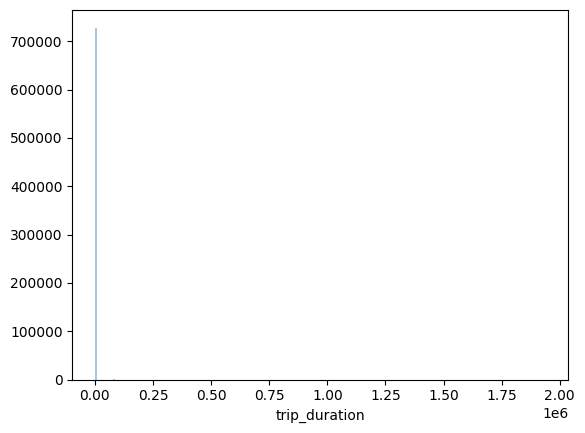

In [13]:
sns.distplot (data['trip_duration'], kde = False, bins = 200)
plt.show()

**Log transforming the 'trip_duration' as it is positively skewed and we want it to be normally distributed**

<ipython-input-14-419247eddfa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data['log_trip_duration'], kde = False, bins = 200)


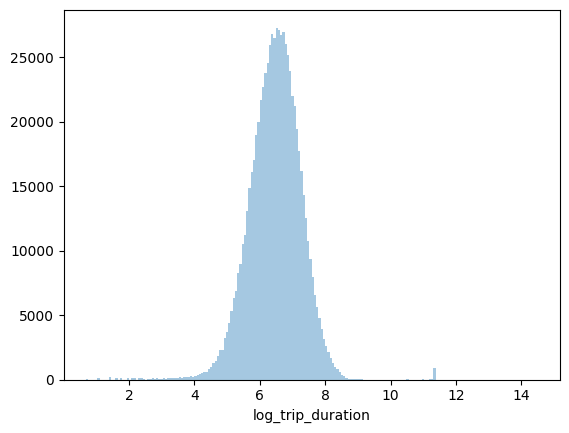

In [14]:
data['log_trip_duration'] = np.log (data['trip_duration'].values + 1)
sns.distplot (data['log_trip_duration'], kde = False, bins = 200)
plt.show()

**Splitting the train and test dataset**

In [15]:
from sklearn.utils import shuffle

data = shuffle (data, random_state = 42)

div = int (data.shape[0]/4)

train = data.loc[:3*div+1, :]
test = data.loc[3*div+1:]

**Calculating the mean squared error of test 'log_trip_duration' against the mean of train 'log_trip_duration'**

In [16]:
test['simple_mean'] = train['log_trip_duration'].mean()

<ipython-input-16-53863a156e49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['simple_mean'] = train['log_trip_duration'].mean()


In [17]:
from sklearn.metrics import mean_squared_error as mse
simple_mean_error = mse (test['log_trip_duration'] , test['simple_mean'])
simple_mean_error

0.630993275932988

**Our benchmark model have a MSE of 0.631. Our models should have a lesser MSE than this**